In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [17]:
from src.GA import *
from src.OED import *
from pde.AdvectionEquation import *

In [22]:
gym_config = OEDGymConfig()
ga_config = GAConfig()

seed = 0
adv_config = Adv2dModelConfig()
adv_eq = Advection2D(adv_config)

gym_config.n_sensor = 10

ga = GA_OED(seed, pde_system=adv_eq, gym_config=gym_config, ga_config=ga_config)

/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [23]:
best_individual, best_fitness, sensor_positions, logbook = ga.run()

gen	nevals	avg     	min     	max     
0  	100   	-60.5221	-72.6581	-54.4245
1  	76    	-58.2628	-65.0894	-54.4245
2  	85    	-57.4041	-69.5395	-54.0485
3  	79    	-56.7573	-61.3835	-54.0485
4  	81    	-56.2811	-60.8799	-54.0485
5  	87    	-55.8072	-64.215 	-53.7562
6  	67    	-55.1824	-62.0206	-53.4604
7  	81    	-54.828 	-59.6036	-53.3886
8  	78    	-54.4307	-61.3759	-53.2764
9  	82    	-53.8967	-57.3343	-53.1164
10 	77    	-53.6572	-56.9758	-53.1164
11 	74    	-53.4078	-56.3663	-53.1164
12 	75    	-53.2061	-55.0172	-53.1164
13 	76    	-53.1211	-53.5815	-53.1164
14 	82    	-53.1618	-54.936 	-53.1164
15 	82    	-53.1616	-55.1314	-53.1164
16 	73    	-53.2113	-58.1416	-53.1164
17 	83    	-53.2057	-61.1301	-52.5448
18 	75    	-53.1921	-57.5332	-52.5448
19 	78    	-53.1083	-54.7463	-52.5357
20 	87    	-53.2029	-60.075 	-52.5448
21 	76    	-52.9757	-54.4637	-52.2615
22 	79    	-52.8808	-55.5165	-52.2615
23 	70    	-52.6844	-59.1645	-52.2615
24 	88    	-52.6875	-58.3623	-52.2615
25 	71    	-

In [24]:
print(f"Best fitness (coverage percentage): {best_fitness}")
print(f"Sensor positions: {sensor_positions}")

Best fitness (coverage percentage): -52.15991038429664
Sensor positions: [(1, 6), (10, 18), (10, 29), (10, 47), (24, 8), (27, 37), (32, 48), (34, 27), (36, 37), (47, 2)]


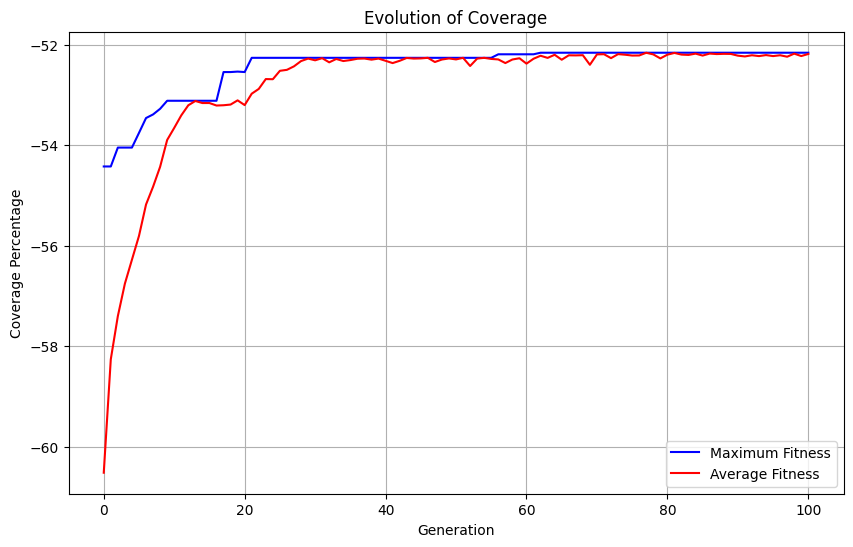

In [25]:
# Visualize the solution
# ga.visualize_solution(sensor_positions)

# Plot evolution progress
gen = logbook.select("gen")
fit_max = logbook.select("max")
fit_avg = logbook.select("avg")

plt.figure(figsize=(10, 6))
plt.plot(gen, fit_max, 'b-', label='Maximum Fitness')
plt.plot(gen, fit_avg, 'r-', label='Average Fitness')
plt.title('Evolution of Coverage')
plt.xlabel('Generation')
plt.ylabel('Coverage Percentage')
plt.legend()
plt.grid(True)
plt.show()

/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max 
0  	100   	0.514444	0.373333	0.68
1  	84    	0.558533	0.391111	0.68
2  	82    	0.588356	0.422222	0.697778
3  	72    	0.620489	0.502222	0.706667
4  	84    	0.642489	0.511111	0.715556
5  	80    	0.668756	0.511111	0.715556
6  	69    	0.686578	0.546667	0.72    
7  	81    	0.688933	0.564444	0.724444
8  	81    	0.687644	0.551111	0.733333
9  	78    	0.6964  	0.586667	0.728889
10 	79    	0.706267	0.582222	0.733333
11 	71    	0.718133	0.6     	0.733333
12 	77    	0.723867	0.604444	0.733333
13 	81    	0.725244	0.582222	0.733333
14 	74    	0.729467	0.657778	0.737778
15 	80    	0.730622	0.586667	0.737778
16 	74    	0.729956	0.626667	0.737778
17 	87    	0.734222	0.693333	0.737778
18 	77    	0.734356	0.657778	0.737778
19 	77    	0.7332  	0.6     	0.737778
20 	77    	0.733733	0.635556	0.737778
21 	69    	0.729867	0.6     	0.737778
22 	78    	0.7364  	0.6     	0.737778
23 	79    	0.734844	0.604444	0.737778
24 	80    	0.733867	0.604444	0.737778
25 	76    	0.735156	0.64

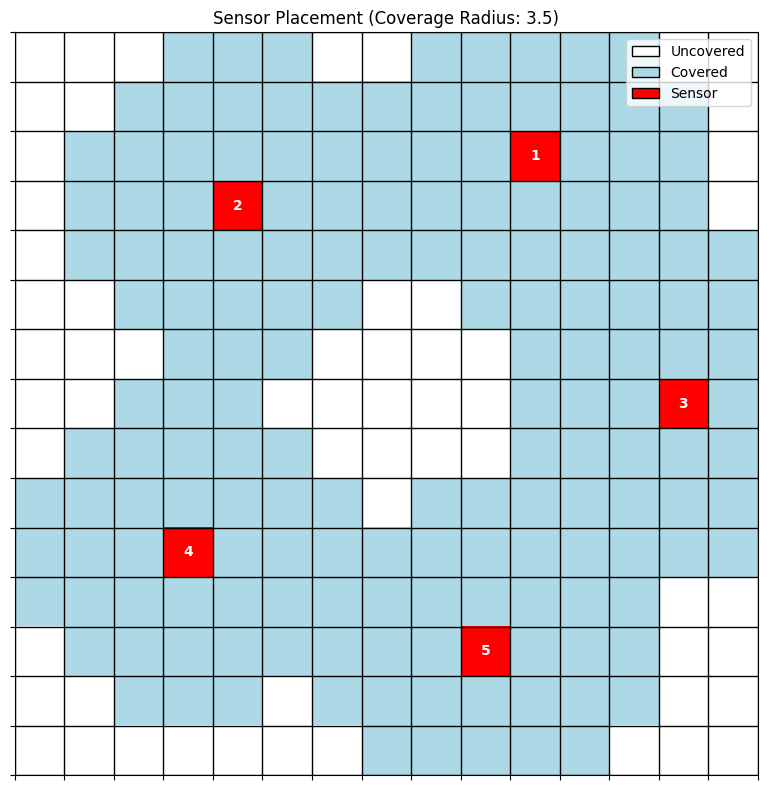

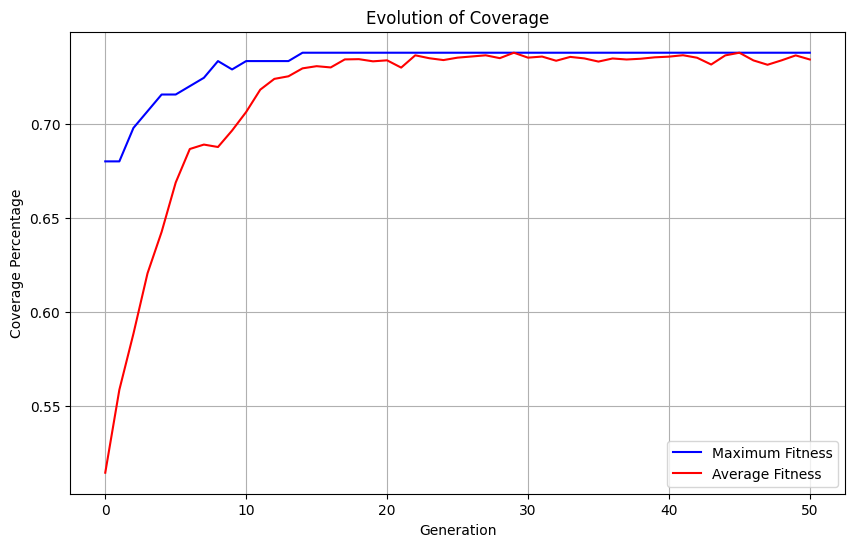

In [10]:


class SensorPlacementGA:
    def __init__(self, grid_size=(10, 10), num_sensors=5, population_size=100, 
                 coverage_radius=2.0, generations=50):
        """
        Initialize the Sensor Placement optimization using Genetic Algorithm.
        
        Parameters:
        -----------
        grid_size : tuple (n1, n2)
            Size of the grid
        num_sensors : int
            Number of sensors to place
        population_size : int
            Size of population for GA
        coverage_radius : float
            Radius of coverage for each sensor
        generations : int
            Number of generations to evolve
        """
        self.grid_size = grid_size
        self.n1, self.n2 = grid_size
        self.num_sensors = num_sensors
        self.population_size = population_size
        self.coverage_radius = coverage_radius
        self.generations = generations
        
        # Set up the DEAP framework
        self._setup_ga()
        
    def _setup_ga(self):
        """Set up the genetic algorithm components."""
        # Create fitness and individual classes
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        self.toolbox = base.Toolbox()
        
        # Define gene initialization function to create binary string
        # Length is n1*n2 where 1s represent sensor positions
        def create_individual():
            # Create a binary string with exactly num_sensors 1s
            individual = [0] * (self.n1 * self.n2)
            ones_indices = random.sample(range(self.n1 * self.n2), self.num_sensors)
            for idx in ones_indices:
                individual[idx] = 1
            return individual
        
        # Register creation functions
        self.toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
        self.toolbox.register("population", tools.initRepeat, list, self.toolbox.individual)
        
        # Register evaluation, crossover, mutation, and selection
        self.toolbox.register("evaluate", self._evaluate_coverage)
        self.toolbox.register("mate", self._custom_crossover)
        self.toolbox.register("mutate", self._custom_mutation)
        self.toolbox.register("select", tools.selTournament, tournsize=3)
        
    def _custom_crossover(self, ind1, ind2):
        """
        Custom crossover that maintains exactly num_sensors 1s in each individual.
        """
        # Get positions of 1s in both parents
        ones_ind1 = [i for i, val in enumerate(ind1) if val == 1]
        ones_ind2 = [i for i, val in enumerate(ind2) if val == 1]
        
        # Select crossover point
        crossover_point = random.randint(1, self.num_sensors - 1)
        
        # Create children
        child1 = [0] * (self.n1 * self.n2)
        child2 = [0] * (self.n1 * self.n2)
        
        # First part from parent 1, second part from parent 2
        for idx in ones_ind1[:crossover_point] + ones_ind2[crossover_point:]:
            child1[idx] = 1
            
        # First part from parent 2, second part from parent 1
        for idx in ones_ind2[:crossover_point] + ones_ind1[crossover_point:]:
            child2[idx] = 1
            
        # Fix if we have duplicate positions (not exactly num_sensors 1s)
        child1 = self._fix_individual(child1)
        child2 = self._fix_individual(child2)
        
        # Replace parents with children
        ind1[:] = child1
        ind2[:] = child2
        
        return ind1, ind2
    
    def _fix_individual(self, individual):
        """Ensure individual has exactly num_sensors 1s."""
        ones_count = sum(individual)
        
        if ones_count < self.num_sensors:
            # Add more 1s
            zeros_indices = [i for i, val in enumerate(individual) if val == 0]
            to_add = random.sample(zeros_indices, self.num_sensors - ones_count)
            for idx in to_add:
                individual[idx] = 1
        elif ones_count > self.num_sensors:
            # Remove excess 1s
            ones_indices = [i for i, val in enumerate(individual) if val == 1]
            to_remove = random.sample(ones_indices, ones_count - self.num_sensors)
            for idx in to_remove:
                individual[idx] = 0
                
        return individual
    
    def _custom_mutation(self, individual, indpb=0.1):
        """
        Custom mutation that maintains exactly num_sensors 1s.
        Moves a sensor from one location to another.
        """
        if random.random() < indpb:
            # Get current sensor positions
            ones_indices = [i for i, val in enumerate(individual) if val == 1]
            zeros_indices = [i for i, val in enumerate(individual) if val == 0]
            
            # Select a sensor to move
            to_move = random.choice(ones_indices)
            
            # Select a new position
            new_pos = random.choice(zeros_indices)
            
            # Move the sensor
            individual[to_move] = 0
            individual[new_pos] = 1
            
        return individual,
    
    def _evaluate_coverage(self, individual):
        """
        Evaluate the coverage of sensors on the grid.
        Returns a fitness score based on the proportion of the grid covered.
        """
        # Convert flat index to 2D coordinates
        sensor_positions = []
        for i, val in enumerate(individual):
            if val == 1:
                row = i // self.n2
                col = i % self.n2
                sensor_positions.append((row, col))
        
        # Create a coverage grid
        coverage = np.zeros(self.grid_size)
        
        # Mark cells covered by sensors
        for row in range(self.n1):
            for col in range(self.n2):
                # Check if this cell is covered by any sensor
                for s_row, s_col in sensor_positions:
                    distance = np.sqrt((row - s_row)**2 + (col - s_col)**2)
                    if distance <= self.coverage_radius:
                        coverage[row, col] = 1
                        break
        
        # Calculate coverage percentage
        coverage_percentage = np.sum(coverage) / (self.n1 * self.n2)
        
        return coverage_percentage,
    
    def run(self):
        """Run the genetic algorithm to find optimal sensor placement."""
        # Create initial population
        pop = self.toolbox.population(n=self.population_size)
        
        # Hall of Fame to keep track of best individual
        hof = tools.HallOfFame(1)
        
        # Statistics to track
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("min", np.min)
        stats.register("max", np.max)
        
        # Run the algorithm
        pop, logbook = algorithms.eaSimple(
            pop, 
            self.toolbox, 
            cxpb=0.7,  # Crossover probability
            mutpb=0.3,  # Mutation probability
            ngen=self.generations, 
            stats=stats, 
            halloffame=hof,
            verbose=True
        )
        
        # Get the best solution
        best_individual = hof[0]
        best_fitness = hof[0].fitness.values[0]
        
        # Convert best individual to sensor positions
        sensor_positions = []
        for i, val in enumerate(best_individual):
            if val == 1:
                row = i // self.n2
                col = i % self.n2
                sensor_positions.append((row, col))
        
        return best_individual, best_fitness, sensor_positions, logbook
    
    def visualize_solution(self, sensor_positions):
        """Visualize the sensor placement and coverage."""
        plt.figure(figsize=(10, 8))
        
        # Create a grid
        grid = np.zeros(self.grid_size)
        
        # Mark sensor positions
        for row, col in sensor_positions:
            grid[row, col] = 2  # Sensors will be marked with 2
        
        # Mark coverage
        for row in range(self.n1):
            for col in range(self.n2):
                # Skip if this cell already has a sensor
                if grid[row, col] == 2:
                    continue
                    
                # Check if this cell is covered by any sensor
                for s_row, s_col in sensor_positions:
                    distance = np.sqrt((row - s_row)**2 + (col - s_col)**2)
                    if distance <= self.coverage_radius:
                        grid[row, col] = 1  # Covered cells will be marked with 1
                        break
        
        # Create custom colormap: 0=white (uncovered), 1=light blue (covered), 2=red (sensor)
        from matplotlib.colors import ListedColormap
        cmap = ListedColormap(['white', 'lightblue', 'red'])
        
        # Plot the grid
        plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
        
        # Add grid lines
        plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
        plt.xticks(np.arange(-0.5, self.n2, 1), [])
        plt.yticks(np.arange(-0.5, self.n1, 1), [])
        
        # Add numbers to mark sensor positions
        for i, (row, col) in enumerate(sensor_positions):
            plt.text(col, row, str(i+1), color='white', ha='center', va='center', fontweight='bold')
        
        # Add labels and title
        plt.title(f'Sensor Placement (Coverage Radius: {self.coverage_radius})')
        
        # Add a legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='white', edgecolor='k', label='Uncovered'),
            Patch(facecolor='lightblue', edgecolor='k', label='Covered'),
            Patch(facecolor='red', edgecolor='k', label='Sensor')
        ]
        plt.legend(handles=legend_elements, loc='upper right')
        
        plt.tight_layout()
        plt.show()

